# Banco de dados -  Faces

Faça o download do conjunto de dados: https://fei.edu.br/~cet/frontalimages_manuallyaligned_part1.zip

### Importar bibliotecas

In [3]:
import os
import gridfs
from pymongo import MongoClient
from PIL import Image
from IPython.display import display
import io

### Conexão com banco - MongoDB

In [4]:
client = MongoClient("mongodb://localhost:27017/")
db = client["midias"]
fs = gridfs.GridFS(db)

### Inserindo imagens

In [6]:
pasta = "frontalimages_manuallyaligned_part1"

arquivos = {f for f in os.listdir(pasta) if f.lower().endswith(".jpg")}
print(f"encontradas {len(arquivos)} imagens na pasta '{pasta}'")

for nome in arquivos:
    caminho = os.path.join(pasta, nome)
#verifica se ja foi salva(evita duplicação)
    if fs.exists(filename = nome):
        print(f"ja existe: {nome}")
        continue
    with open(caminho, "rb") as f:
        fs.put(f, filename = nome)
        print(f"salva: {nome}")

encontradas 200 imagens na pasta 'frontalimages_manuallyaligned_part1'
ja existe: 57a.jpg
ja existe: 14b.jpg
ja existe: 39a.jpg
ja existe: 92a.jpg
ja existe: 8a.jpg
ja existe: 73b.jpg
ja existe: 20a.jpg
ja existe: 51a.jpg
ja existe: 89b.jpg
ja existe: 61b.jpg
ja existe: 100a.jpg
ja existe: 67a.jpg
ja existe: 87a.jpg
ja existe: 22a.jpg
ja existe: 1a.jpg
ja existe: 93b.jpg
ja existe: 19b.jpg
ja existe: 38a.jpg
ja existe: 71a.jpg
ja existe: 31a.jpg
ja existe: 32a.jpg
ja existe: 69a.jpg
ja existe: 61a.jpg
ja existe: 93a.jpg
ja existe: 27a.jpg
ja existe: 27b.jpg
ja existe: 50b.jpg
ja existe: 30b.jpg
ja existe: 71b.jpg
ja existe: 35b.jpg
ja existe: 4b.jpg
ja existe: 78a.jpg
ja existe: 46b.jpg
ja existe: 74a.jpg
ja existe: 97b.jpg
ja existe: 58b.jpg
ja existe: 47a.jpg
ja existe: 84a.jpg
ja existe: 83b.jpg
ja existe: 53b.jpg
ja existe: 82b.jpg
ja existe: 58a.jpg
ja existe: 62a.jpg
ja existe: 99b.jpg
ja existe: 85b.jpg
ja existe: 48b.jpg
ja existe: 60b.jpg
ja existe: 17a.jpg
ja existe: 19a.jpg


### Listar as imagens armazenadas

In [7]:
print("img armazenada no mongodb")
for file in db.fs.find({}, {"filename": 1, "_id": 0}):
    print("-", file["filename"])

img armazenada no mongodb


### Exibir as imagens em sequência (tipo galeria)

gumball.jpg


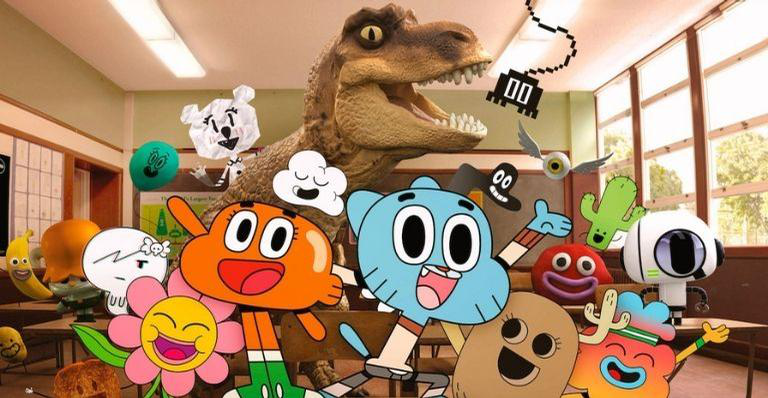

gumball.jpg


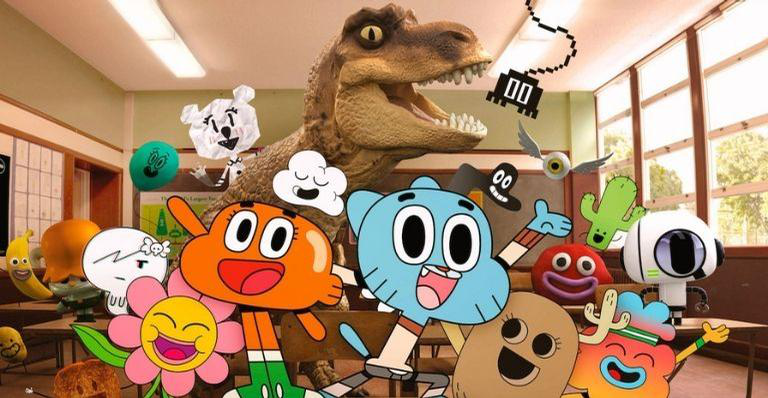

vivi.jpg


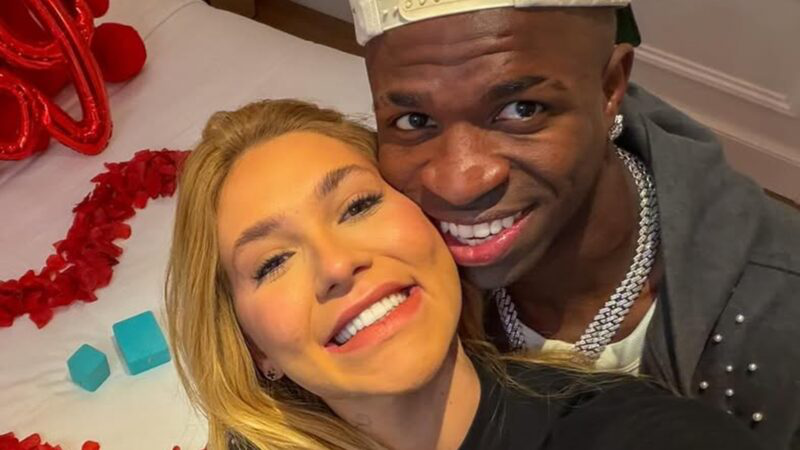

vivi.jpg


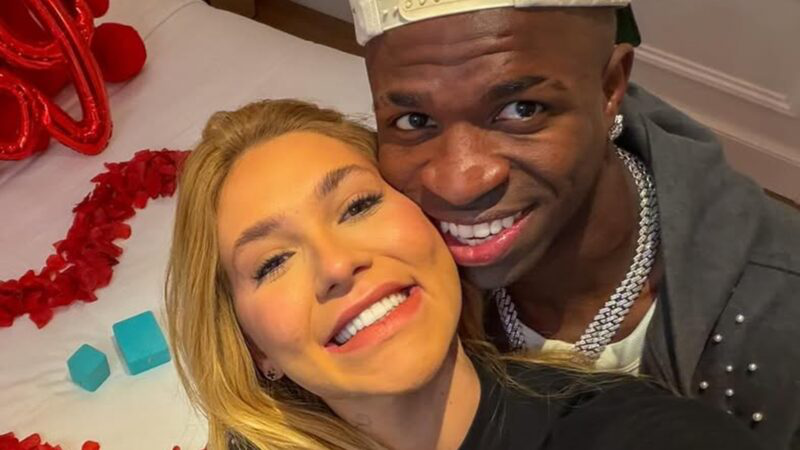

57a.jpg


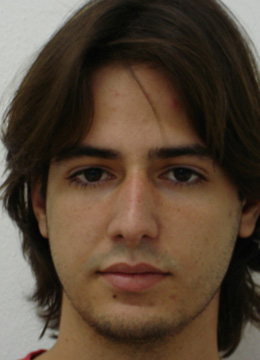

14b.jpg


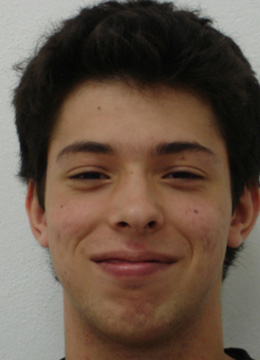

39a.jpg


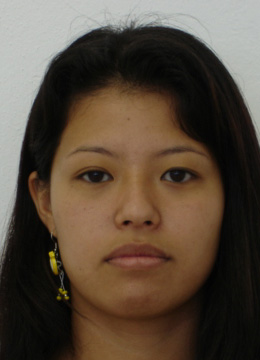

92a.jpg


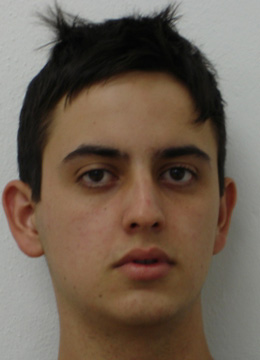

8a.jpg


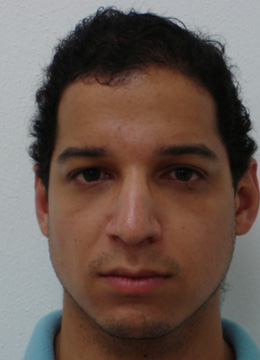

73b.jpg


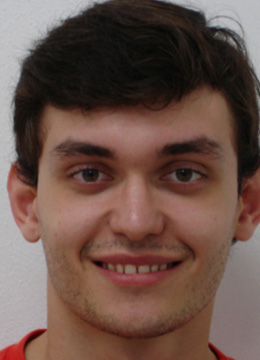

In [10]:
for file in db.fs.files.find().limit(10):
    nome = file["filename"]
    dado = fs.get(file["_id"]).read()
    img = Image.open(io.BytesIO(dado))
    print(f"{nome}")
    display(img)

In [11]:
for file in db.fs.file.find():
    fs.delete(file["_id"])
print("todas as imgs foram removidas removidas do GridFS")

todas as imgs foram removidas removidas do GridFS
